In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
def loadNpy(filename):
    with open(os.getcwd() + "/train-val-test/"+ filename, "rb") as f: return np.load(f)

In [20]:
db = "db13/"

In [21]:
X_train, X_val, X_test = loadNpy(db + "X_train.npy"), loadNpy(db + "X_val.npy"), loadNpy(db + "X_test.npy")
y_train, y_val, y_test = loadNpy(db + "y_train.npy"), loadNpy(db + "y_val.npy"), loadNpy(db + "y_test.npy")

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

### Regression

In [23]:
lr.fit(X_train, y_train)

# Predict
y_pred = [1 if p >= 1 else 0 for p in lr.predict(X_test)]
y_actual = [1 if y >= 1 else 0 for y in y_test]

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

0.41633319989322654


### Classification

In [24]:
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5438439800605377


# SVM

In [25]:
from sklearn import svm

### Regression

In [26]:
regr = svm.SVR()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1945980414575154


In [27]:
y_pred = [1 if p >= 1 else 0 for p in regr.predict(X_test)]
y_actual = [1 if y >= 1 else 0 for y in y_test]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

0.5163977794943222


### Classification

In [28]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.accuracy_score(y_test, y_pred))

0.2
0.96


#### Visualizing Test Cases

In [29]:
j = 5

In [32]:
x0 = X_test[j,:]
y0 = y_test[j]
yp0 = regr.predict(x0.reshape(1,-1))

ecg = np.zeros((130))

offset = 0
for i in range(10):
    ecg[i*13:i*13+13] = x0[i*89:i*89 + 13]

[0.04524223]
0.0


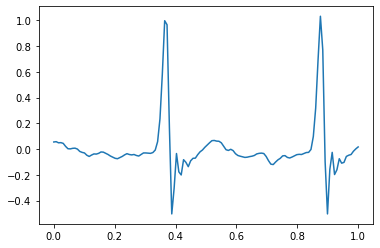

In [33]:
plt.plot(np.linspace(0,1,130), (ecg-np.mean(ecg))/np.max(np.abs(ecg)))
print(yp0)
print(y0)